#LABORATORIO 1 

#Fundamentos de Aprendizaje profundo con redes neuronales

## Autores: Juan De Pablo y Diego Mellis

### Fecha: 23 de Septiembre de 2019


El objetivo de este primer laboratorio es implementar un perceptrón simple, mediante el uso del lenguaje de programación Python. El objetivo es que el perceptrón indique una salida de acuerdo a una entrada, su función de activación y así ir ajustando los pesos durante cada iteración según corresponda.

Como se mencionó anteriormente se utilizará Python, por lo que a continuación se importarán las librerías necesarias para su implementación.


In [40]:
# Estas son las librerías a utilizar

import numpy as np
import matplotlib.pyplot as plt
import csv


# Actividad 1

Dentro de esta primera actividad se pide implementar un perceptrón que tenga una función de activación, ajuste de pesos en cada iteración y entregar una salida acorde a la entrada que reciba. A modo de contexto, el perceptrón simple fue presentado por Frank Rosenblatt en 1958 y corresponde a un modelo matemático que representa a la unidad celular básica presente en la actividad neuronal del ser humano (como se menciona en el enunciado de este laboratorio).

A continuación se presentará la unidad básica del perceptrón que sería la neurona. Esta función recibirá las entradas definidas y los pesos que en un inicio se definen aleatoriamente. Dentro de esta función se irán sumando las entradas ponderadas por los pesos definidos. Si este valor es mayor o igual cero, la neurona retornará 1 y en caso contrario 0, con la finalidad de representar un escalón unitario como función de activación.

In [41]:

def neuronPrediction(inputs,weights):
    activation = 0.0
    for i,w in zip(inputs, weights): # zip genera una tupla de la entrada con el peso
        activation = activation + i*w # (ponderación de pesos con entradas)
    if activation >= 0.0:
        return 1.0
    else:
        return 0.0

Ahora, una vez implementada esta función es necesario también saber la exactitud del perceptrón, esto es para graficar a futuro y ver la evolución del perceptrón a medida que se entrena. Además sirve también para detener el entrenamiento en caso de que se llegue a un acierto del 100% antes de que terminen las iteraciones.


In [42]:
def perceptronHits(data, weights):
    n_values = len(data[0]) - 1 # En este caso serán siempre 4 entradas + el bias (5)
    hits = 0.0
    for i in range(len(data)): # Cada fila de la matriz es un conjunto de entrada
        prediction = neuronPrediction(data[i][0:n_values], weights)
        # La idea es comparar si la predicción es igual al valor esperado (ultimo valor de la cada fila)
        if prediction==data[i][n_values]: 
            hits += 1.0
    # Se retorna una ponderación
    return hits/float(len(data))

A continuación se implementa la función de entrenamiento del perceptrón, en donde la idea es que en base a las iteraciones o la exactitud del perceptrón, se prediga y se llegue al valor acertado. 



In [43]:
def training(data,weights,iterations, learning_ratio):
    error_list = []
    error_list_iterations = []
    hits_list = []
    lenght = len(data)
    max_entries = len(data[0]) - 1 # 4 entradas + el bias (5)
    for iteration in range(iterations):

        if(iteration == 0):
            hit = perceptronHits(data, weights)
            hits_list.append(hit)
        total_error = 0
        hits_sum= perceptronHits(data,weights)
        for i in range(lenght):
            actual_prediction = neuronPrediction(data[i][0:max_entries], weights)
            error = data[i][max_entries] - actual_prediction # y esperado - y(gorro)
            error_list.append(error)
            total_error += error
            for j in range(len(weights)-1):
                weights[j] = weights[j]+(learning_ratio*error*data[i][j]) # Actualización de los pesos en base al error y el radio de aprendizaje
        
        final_iteration = iteration 

        #Variación de errores por iteración
        total_error = abs(total_error/lenght)
        error_list_iterations.append(total_error)

        # Para ver como varía la exactitud a lo largo de las iteraciones
        hit = perceptronHits(data, weights) 
        hits_list.append(hit)

        #Se detiene si se llega al 100%
        if hits_sum == 1.0:
            break
    return weights, error_list, error_list_iterations, hits_list, final_iteration

Una vez implementadas estas funciones, se procede a usarlas para determinar resultados de las compuertas lógicas **AND**, **OR** y **XOR**, definiendo los siguientes valores de entrada.

Pesos Finales: 
 [-1.70353081 -0.01386067  0.22685145  0.55131477  0.71946897]
Cambio error ponderado: 
 [0.3125, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cambio de exactitud: 
 [0.0625, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
Iteraciones: 
 49


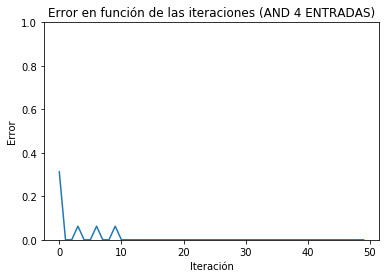

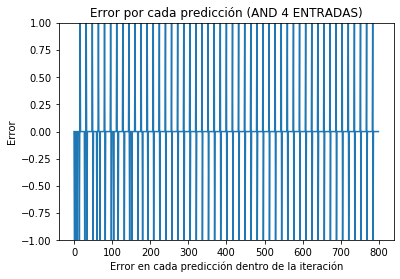

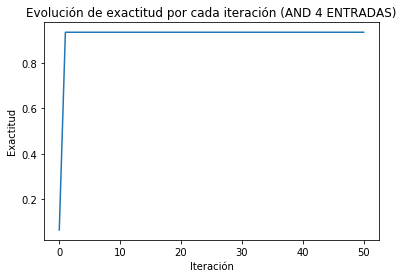

In [44]:
iterations = 50
learning_ratio = 0.3
np.random.seed(123)

# A continuación se generan los datos para las distintas compuertas lógicas
# y sus valores esperados de acuerdo a tablas de verdad obtenidas en internet.

# Cada lista dentro de data está ordenada por: 
#           [BIAS, x1,  x2,  x3,  x4,  y]   #**SIENDO y el esperado**
AND_data = [[1.00,1.00,1.00,1.00,1.00, 1.0],
            [1.00,1.00,1.00,1.00,0.00, 0.0],
            [1.00,1.00,1.00,0.00,1.00, 0.0],
            [1.00,1.00,1.00,0.00,0.00, 0.0],
            [1.00,1.00,0.00,1.00,1.00, 0.0],
            [1.00,1.00,0.00,1.00,0.00, 0.0],
            [1.00,1.00,0.00,0.00,1.00, 0.0],
            [1.00,1.00,0.00,0.00,0.00, 0.0],
            [1.00,0.00,1.00,1.00,1.00, 0.0],
            [1.00,0.00,1.00,1.00,0.00, 0.0],
            [1.00,0.00,1.00,0.00,1.00, 0.0],
            [1.00,0.00,1.00,0.00,0.00, 0.0],
            [1.00,0.00,0.00,1.00,1.00, 0.0],
            [1.00,0.00,0.00,1.00,0.00, 0.0],
            [1.00,0.00,0.00,0.00,1.00, 0.0],
            [1.00,0.00,0.00,0.00,0.00, 0.0]]

AND_weights = np.random.rand(5)


weights, error_list, error_list_iterations, hits_list, final_iteration = training(AND_data, AND_weights, iterations, learning_ratio)

print("Pesos Finales: \n", weights)
#print("(y esperado - y gorro): \n", error_list)
print("Cambio error ponderado: \n", error_list_iterations)
print("Cambio de exactitud: \n", hits_list)
print("Iteraciones: \n", final_iteration)

#Acá se muestra el error por cada iteración
plt.figure(1)
plt.ylim([0,1])
plt.plot(error_list_iterations)
plt.ylabel('Error')
plt.xlabel('Iteración')
plt.title('Error en función de las iteraciones (AND 4 ENTRADAS)')
plt.show()

# Acá se muestra el error de cada predicción
plt.figure(2)
plt.ylim([-1,1])
plt.plot(error_list)
plt.ylabel('Error')
plt.xlabel('Error en cada predicción dentro de la iteración')
plt.title('Error por cada predicción (AND 4 ENTRADAS)')
plt.show()

# Acá se muestra la evolución de exactitud
plt.figure(3)
plt.plot(hits_list)
plt.ylabel('Exactitud')
plt.xlabel('Iteración')
plt.title('Evolución de exactitud por cada iteración (AND 4 ENTRADAS)')
plt.show()


Pesos Finales: 
 [-0.20353081  0.28613933  0.22685145  0.55131477  0.71946897]
Cambio error ponderado: 
 [0.0625, 0.0625, 0.0625, 0.0]
Cambio de exactitud: 
 [0.9375, 0.9375, 0.9375, 1.0, 1.0]
Iteraciones: 
 3


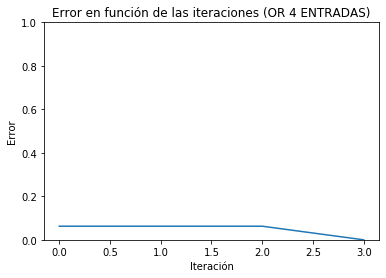

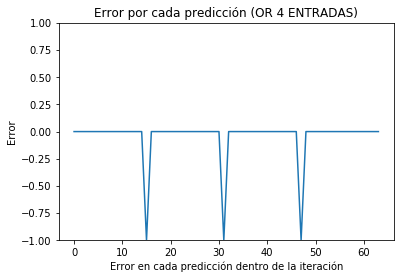

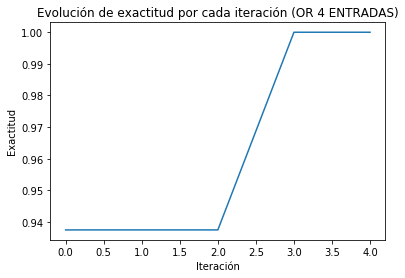

In [45]:
np.random.seed(123)


OR_data =  [[1.00,1.00,1.00,1.00,1.00, 1.0],
            [1.00,1.00,1.00,1.00,0.00, 1.0],
            [1.00,1.00,1.00,0.00,1.00, 1.0],
            [1.00,1.00,1.00,0.00,0.00, 1.0],
            [1.00,1.00,0.00,1.00,1.00, 1.0],
            [1.00,1.00,0.00,1.00,0.00, 1.0],
            [1.00,1.00,0.00,0.00,1.00, 1.0],
            [1.00,1.00,0.00,0.00,0.00, 1.0],
            [1.00,0.00,1.00,1.00,1.00, 1.0],
            [1.00,0.00,1.00,1.00,0.00, 1.0],
            [1.00,0.00,1.00,0.00,1.00, 1.0],
            [1.00,0.00,1.00,0.00,0.00, 1.0],
            [1.00,0.00,0.00,1.00,1.00, 1.0],
            [1.00,0.00,0.00,1.00,0.00, 1.0],
            [1.00,0.00,0.00,0.00,1.00, 1.0],
            [1.00,0.00,0.00,0.00,0.00, 0.0]]

OR_weights = np.random.rand(5)

weights, error_list, error_list_iterations, hits_list, final_iteration = training(OR_data, OR_weights, iterations, learning_ratio)

print("Pesos Finales: \n", weights)
#print("(y esperado - y gorro): \n", error_list)
print("Cambio error ponderado: \n", error_list_iterations)
print("Cambio de exactitud: \n", hits_list)
print("Iteraciones: \n", final_iteration)

#Acá se muestra el error por cada iteración
plt.figure(1)
plt.ylim([0,1])
plt.plot(error_list_iterations)
plt.ylabel('Error')
plt.xlabel('Iteración')
plt.title('Error en función de las iteraciones (OR 4 ENTRADAS)')
plt.show()

# Acá se muestra el error de cada predicción
plt.figure(2)
plt.ylim([-1,1])
plt.plot(error_list)
plt.ylabel('Error')
plt.xlabel('Error en cada predicción dentro de la iteración')
plt.title('Error por cada predicción (OR 4 ENTRADAS)')
plt.show()

# Acá se muestra la evolución de exactitud
plt.figure(3)
plt.plot(hits_list)
plt.ylabel('Exactitud')
plt.xlabel('Iteración')
plt.title('Evolución de exactitud por cada iteración (OR 4 ENTRADAS)')
plt.show()



Pesos Finales: 
 [-0.20353081  0.28613933  0.22685145  0.25131477  0.71946897]
Cambio error ponderado: 
 [0.125, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cambio de exactitud: 
 [0.875, 0.875, 0.625, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]
Iteraciones: 
 49


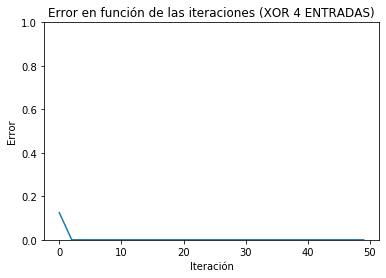

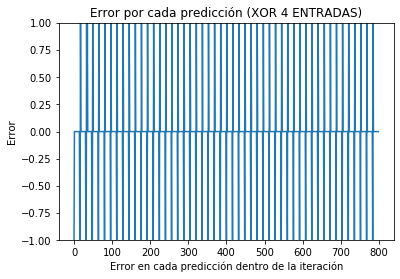

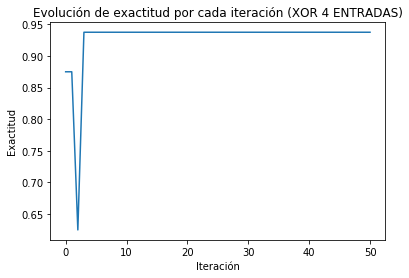

In [46]:
np.random.seed(123)


XOR_data = [[1.00,1.00,1.00,1.00,1.00, 0.0],
            [1.00,1.00,1.00,1.00,0.00, 1.0],
            [1.00,1.00,1.00,0.00,1.00, 1.0],
            [1.00,1.00,1.00,0.00,0.00, 1.0],
            [1.00,1.00,0.00,1.00,1.00, 1.0],
            [1.00,1.00,0.00,1.00,0.00, 1.0],
            [1.00,1.00,0.00,0.00,1.00, 1.0],
            [1.00,1.00,0.00,0.00,0.00, 1.0],
            [1.00,0.00,1.00,1.00,1.00, 1.0],
            [1.00,0.00,1.00,1.00,0.00, 1.0],
            [1.00,0.00,1.00,0.00,1.00, 1.0],
            [1.00,0.00,1.00,0.00,0.00, 1.0],
            [1.00,0.00,0.00,1.00,1.00, 1.0],
            [1.00,0.00,0.00,1.00,0.00, 1.0],
            [1.00,0.00,0.00,0.00,1.00, 1.0],
            [1.00,0.00,0.00,0.00,0.00, 0.0]]
XOR_weights = np.random.rand(5)

weights, error_list, error_list_iterations, hits_list, final_iteration = training(XOR_data, XOR_weights, iterations, learning_ratio)

print("Pesos Finales: \n", weights)
#print("(y esperado - y gorro): \n", error_list)
print("Cambio error ponderado: \n", error_list_iterations)
print("Cambio de exactitud: \n", hits_list)
print("Iteraciones: \n", final_iteration)

#Acá se muestra el error por cada iteración
plt.figure(1)
plt.ylim([0,1])
plt.plot(error_list_iterations)
plt.ylabel('Error')
plt.xlabel('Iteración')
plt.title('Error en función de las iteraciones (XOR 4 ENTRADAS)')
plt.show()

# Acá se muestra el error de cada predicción
plt.figure(2)
plt.ylim([-1,1])
plt.plot(error_list)
plt.ylabel('Error')
plt.xlabel('Error en cada predicción dentro de la iteración')
plt.title('Error por cada predicción (XOR 4 ENTRADAS)')
plt.show()

# Acá se muestra la evolución de exactitud
plt.figure(3)
plt.plot(hits_list)
plt.ylabel('Exactitud')
plt.xlabel('Iteración')
plt.title('Evolución de exactitud por cada iteración (XOR 4 ENTRADAS)')
plt.show()

# Actividad 2

Para esta actividad, se entrega un archivo .csv que contiene dos entradas, siendo esta el largo y el ancho, sumado a la salida esperada, que consiste en definir si dependiendo de las entradas es una **l** o una **o**. A continuación se procede a leer el archivo y a definir variables de entrada para el perceptrón.

In [1]:
np.random.seed(123)
iterations = 50
learning_ratio = 0.24
file = open('letters.csv')  
file_data = csv.reader(file) 
i = 0
final_data = [] # Se incluirá el BIAS
original_data = []
    
for line in file_data:
    if(i%2 == 0):
        aux = []
        aux.append(1.0)  # Primer valor corresponde al BIAS
        aux.append(float(line[0])) # Largo
        aux.append(float(line[1])) # Ancho
        
        # Se define 'o' = 0.0 y 'l' = 1.0
        if(line[2] == 'o'): 
            aux.append(0.0)
        else:
            aux.append(1.0)
        final_data.append(aux)
        original_data.append(aux[1:4])
    i = i + 1
        
weight = np.random.rand(3)
weights, error_list, error_list_iterations, hits_list, final_iteration = training(final_data, weights, iterations, learning_ratio)
    
    
print("Pesos Finales: \n", weights)
#print("(y esperado - y gorro): \n", error_list)
print("Cambio error ponderado: \n", error_list_iterations)
print("Cambio de exactitud: \n", hits_list)
print("Iteraciones: \n", final_iteration)

#Acá se muestra el error por cada iteración
plt.figure(1)
plt.ylim([0,1])
plt.plot(error_list_iterations)
plt.ylabel('Error')
plt.xlabel('Iteración')
plt.title('Error en función de las iteraciones')
plt.show()

# Acá se muestra el error de cada predicción
plt.figure(2)
plt.ylim([-1,1])
plt.plot(error_list)
plt.ylabel('Error')
plt.xlabel('Error en cada predicción dentro de la iteración')
plt.title('Error por cada predicción')
plt.show()

# Acá se muestra la evolución de exactitud
plt.figure(3)
plt.plot(hits_list)
plt.ylabel('Exactitud')
plt.xlabel('Iteración')
plt.title('Evolución de exactitud por cada iteración')
plt.show()

NameError: name 'np' is not defined

# Conclusiones


## Actividad 1


De acuerdo a lo implementado en esta actividad es posible observar que tanto para la compuerta lógica **AND** como también en la compuerta **OR** se logra llegar a un resultado esperado, disminuyendo el error a medida que avanzan las iteraciones, observando el primera gráfico que se muestra en cada sección. A pesar de mostrar que el error llega a cero, durante las predicciones entre cada iteración (Gráfico 2 de cada compuerta) se puede observar como oscila en algunas ocasiones entre 1 y -1, implicando que no se puede asegurar que el Perceptrón Simple aprendió completamente con un 100% de certeza. Por otro lado, en el tercer gráfico se ve como evoluciona la exactitud, pero aún así no es seguro guiarse solo por uno de estos gráficos.

Por otro lado, para la compuerta lógica **XOR** si bien es cierto también se reduce el error a 0 después de cierta cantidad de iteraciones, el segundo gráfico indica que las predicciones varían en gran parte durante cada iteración, esto se debe, a que según lo visto en clases, una compuerta **XOR** no es linealmente separable, por lo tanto oscila constantemente tratando de predecir el resultado esperado. Esto también queda demostrado en la evolución de la exactitud, en donde la idea de este gráfico es demostrar que se llega a una exactitud del 100% (o certeza), pero en esta situación no se da, llegando asintóticamente a un valor cercano a 1 (0,935). Por lo tanto, en base a lo realizado es posible demostrar que no es linealmente separable, lo que se respalda con lo enseñado en la asignatura.

## Actividad 2

En esta ocasión, se entregaba un set de datos, definidos por un largo, un ancho y el resultado esperado. Aquí se optó por obtener esos datos, añadirle un bias necesario para la predicción que debe realizar el Perceptrón, además de cambiar la definición de **'l'** y **'o'** por 1 y 0 respectivamente. Aquí los resultados, presentan una situación similar a lo de la compuerta **XOR** en donde el error después de 49 iteraciones, llega a 0, pero durante las predicciones existe una oscilación muy densa entre 1 y -1 durante cada iteración, no pudiendo definir así correctamente la semejanza al valor esperado, esto se respalda con el gráfico de evolución de exactitud, donde también asintóticamente se acerca a 1 pero nunca lo logra, siendo su máximo valor 0,94. Observando los datos cualitativamente, se presentaban situaciones en que el largo y el ancho presentaban las mismas combinaciones tanto para definir una **'l'** o una **'o'**, por lo tanto durante el entrenamiento, no había forma de definir bien un resultado esperado (una evidencia es el segundo gráfico).